# Karar Ağaçları (Decision Tree)
- Karar ağaçları, veri kümesini özelliklerine göre gittikçe daha küçük alt kümelere bölerek çalışan, makine öğrenimindeki veri yapılarıdır. Karar ağaçlarının amacı, geriye yalnızca tek bir veri sınıfı kalana kadar verileri tekrar tekrar bölmektir. Örneğin, ağaç bir dizi evet-hayır sorusu sorarak veriyi her adımda kategorilere ayırabilir.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Veriyi hazırlama : yaş, kan basıncı, kolesterol ve hastalık durumu verisi

data = {
    'Yas':[25,50,45,30,50],
    'Kan_Basinci':[120, 140, 130, 110, 150],
    'Kolesterol':[180, 240, 200, 160, 220],
    'Hastalik':[0,1,1,0,1] # 0 hayır, 1 evet
}

df = pd.DataFrame(data)

X = df[['Yas','Kan_Basinci','Kolesterol']]
y = df['Hastalik']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Model doğruluk oranı: {accuracy}")

yas = int(input("Yaşınızı girin: "))
kan_basinci = int(input("Kan basıncınızı girin: "))
kolesterol = int(input("Kolesterol seviyenizi girin: "))

kullanici_verisi = pd.DataFrame([[yas,kan_basinci,kolesterol]], columns=['Yas','Kan_Basinci','Kolesterol'])
tahmin = classifier.predict(kullanici_verisi)
sonuc = "Hastalık var" if tahmin[0] == 1 else "Hastalık yok"
print("-"*30)
print(f"Yaş: {yas},\nKan basıncı: {kan_basinci},\nKolesterol seviyesi: {kolesterol},\nTahmin: {sonuc}")
print("-"*30)


Model doğruluk oranı: 1.0
------------------------------
Yaş: 25,
Kan basıncı: 120,
Kolesterol seviyesi: 180,
Tahmin: Hastalık yok
------------------------------


| Değişken | Analoji (Benzetme) | Ne İşe Yarar? |
| :--- | :--- | :--- |
| **X_train** | Ders notları (Sorular) | Modelin ders çalışırken baktığı veriler. |
| **y_train** | Ders notları (Cevaplar) | Modelin ders çalışırken baktığı sonuçlar. |
| **fit()** | Ders çalışma eylemi | Modelin veriler arasındaki bağlantıyı kurması. |
| **X_test** | Sınav soruları | Modelin test edildiği, daha önce görmediği veriler. |
| **predict()** | Sınavı çözme eylemi | Modelin yeni verilere bakıp tahminde bulunması. |
| **y_pred** | Öğrencinin cevapları | Modelin yaptığı tahminlerin listesi. |
| **y_test** | Cevap Anahtarı | Modelin ne kadar başarılı olduğunu ölçmek için sakladığımız gerçek sonuçlar. |

---
# Excel Üzerinden Veri Çekmek ve Görselleştirme

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel(r'excel\karar_agaci_veri_100.xlsx')
df.head(5)

,Yas,Kan_Basinci,Kolesterol,Hastalik
0,58,118,228,0
1,48,133,208,1
2,34,110,181,1
3,62,153,245,1
4,27,117,237,1


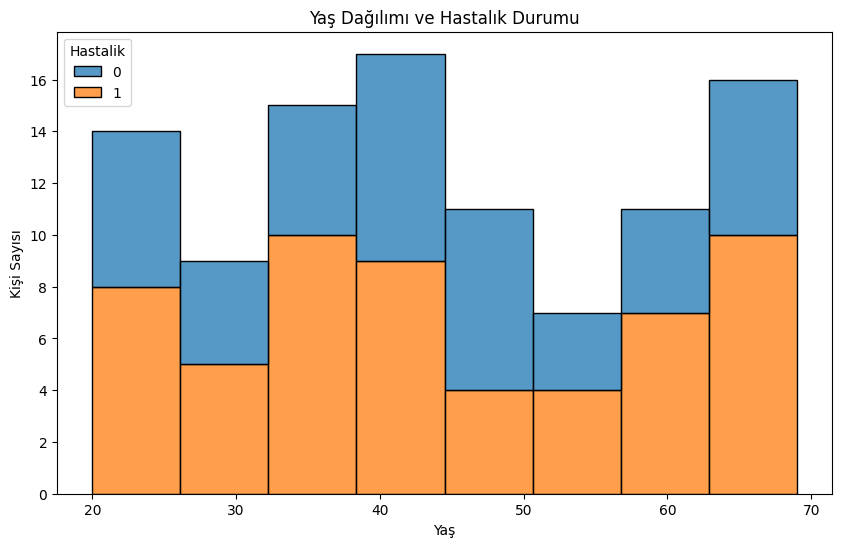

In [3]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, hue='Hastalik',x='Yas', multiple='stack', kde=False)
# sns.histplot bir istatistik grafiğidir ve görevi dağılımı saymaktır
plt.title('Yaş Dağılımı ve Hastalık Durumu')
plt.xlabel('Yaş')
plt.ylabel('Kişi Sayısı')
plt.show()

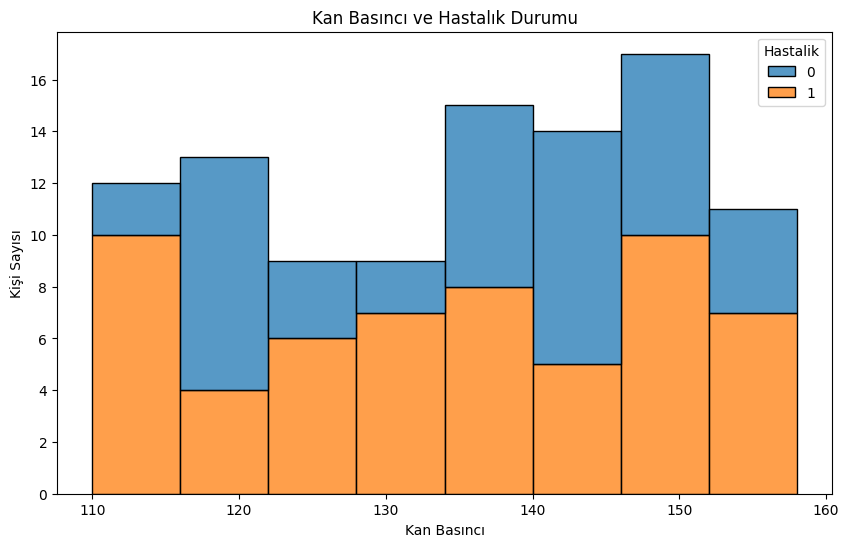

In [4]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, hue='Hastalik',x='Kan_Basinci', multiple='stack', kde=False)
# sns.histplot bir istatistik grafiğidir ve görevi dağılımı saymaktır
plt.title('Kan Basıncı ve Hastalık Durumu')
plt.xlabel('Kan Basıncı')
plt.ylabel('Kişi Sayısı')
plt.show()

---
# Makine Öğrenmesinin Doğruluğunu Ölçmek

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_excel(r'excel\karar_agaci_veri_100.xlsx')
df


,Yas,Kan_Basinci,Kolesterol,Hastalik
0,58,118,228,0
1,48,133,208,1
2,34,110,181,1
3,62,153,245,1
4,27,117,237,1
...,...,...,...,...
95,34,146,254,0
96,64,142,248,1
97,20,151,168,0
98,44,153,197,0


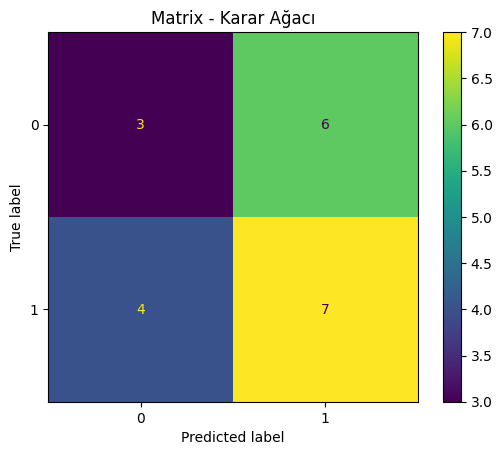

In [6]:
X = df[['Yas','Kan_Basinci' ,'Kolesterol']]
y = df['Hastalik']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
c_m = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_m)
disp.plot()
plt.title('Matrix - Karar Ağacı')
plt.show() # 2^n

---
# Çapraz Doğrulama ile Makine Öğrenmesi Oranını Arttırma

In [7]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_excel(r'excel\karar_agaci_veri_100.xlsx')
df

,Yas,Kan_Basinci,Kolesterol,Hastalik
0,58,118,228,0
1,48,133,208,1
2,34,110,181,1
3,62,153,245,1
4,27,117,237,1
...,...,...,...,...
95,34,146,254,0
96,64,142,248,1
97,20,151,168,0
98,44,153,197,0


In [8]:
X = df[['Yas','Kan_Basinci' ,'Kolesterol']]
y = df['Hastalik']


classifier = DecisionTreeClassifier()
cross_val_scores = cross_val_score(classifier,X,y,cv=5)

print(f"Çağraz doğrulama skorları: {cross_val_scores}")

Çağraz doğrulama skorları: [0.45 0.25 0.7  0.35 0.45]


[![ff}](https://i.hizliresim.com/8syr7by.png)]

In [9]:
classifier = DecisionTreeClassifier(max_depth=10,min_samples_split=3,min_samples_leaf=2)
cross_val_scores = cross_val_score(classifier,X,y,cv=5)

print(f"Çağraz Doğrulama Skorları: {cross_val_scores}")
print(f"Ortalama Doğrulama Skoru: {cross_val_scores.mean():.2f}")

Çağraz Doğrulama Skorları: [0.5  0.3  0.5  0.45 0.45]
Ortalama Doğrulama Skoru: 0.44


**max_depth:** Ağacın en tepesinden en aşağıya kadar inebileceği maksimum katman (soru sorma) sayısıdır.

**min_samples_split:** Bir kutucuğun ikiye bölünüp yeni bir kural oluşturulabilmesi için, o kutucuğun içinde halihazırda bulunması gereken en az veri sayısıdır.

**min_samples_leaf:** Bölünme işlemi bittikten sonra dalın ucunda kalan son kutucukta (sonuç kısmında) bulunmasına izin verilen en az veri sayısıdır.

---
# Kullanıcıdan Değer Alarak Tahmin Etmek

In [14]:
X = df[['Yas','Kan_Basinci' ,'Kolesterol']]
y = df['Hastalik']

classifier = DecisionTreeClassifier(max_depth=4,min_samples_split=2,min_samples_leaf=2)
classifier.fit(X,y)
yas=int(input("Yaşınızı girin: "))
kan_basinci= int(input("Kan basıncı değerinizi girin: "))
kolesterol= int(input("Kolesterol değerinizi girin: "))

yeni_veri = pd.DataFrame([[yas,kan_basinci,kolesterol]], columns=(['Yas','Kan_Basinci' ,'Kolesterol']))

tahmin=classifier.predict(yeni_veri)  

cikti = f"Yaş: {yas},\nKan Basıncı: {kan_basinci},\nKolesterol: {kolesterol},\n"
if tahmin[0] == 1:
    cikti+="Hastalık var"
else:
    cikti+="Hastalık yok"
print(cikti)

Yaş: 58,
Kan Basıncı: 118,
Kolesterol: 228,
Hastalık yok
